#Task 2

In [2]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, applications
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set the random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define the path to the dataset
dataset_path = "/content/drive/MyDrive/DBS/MLPR Images"

In [4]:
# Define the input size of the images
img_height = 1600
img_width = 1200

# Define the batch size for training and testing
batch_size = 16

# Define the number of epochs for training
epochs = 1

In [5]:
# Define the data augmentation strategy for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Define the data augmentation strategy for testing
test_datagen = ImageDataGenerator(
    rescale=1.0/255
)

In [6]:
# Create the training dataset
train_ds = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    class_mode='categorical',
    subset='training'
)

Found 1520 images belonging to 5 classes.


In [7]:

# Create the validation dataset
val_ds = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    seed=42,
    class_mode='categorical',
    subset='validation'
)

Found 379 images belonging to 5 classes.


In [8]:

# preparing the testing dataset
test_ds = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 1899 images belonging to 5 classes.


In [9]:
# Define the transfer learning model (MobileNetV2)
base_model = applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model
base_model.trainable = False

In [10]:
# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_ds.num_classes, activation='softmax')
])

In [11]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 50, 38, 1280)     2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2,422,597
Trainable params: 164,613
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
# Train the model
history_tl = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
)

95/95 [==============================] - 5067s 53s/step - loss: 0.6025 - accuracy: 0.7934 - val_loss: 0.7001 - val_accuracy: 0.7652


In [ ]:
# Evaluate the model on the testing dataset
test_loss_tl, test_acc_tl = model.evaluate(test_ds)

# Print the testing accuracy and loss
print(f"Transfer Learning Model - Testing Loss: {test_loss_tl:.4f}, Testing Accuracy: {test_acc_tl:.4f}")

  3/119 [..............................] - ETA: 1:07:50 - loss: 2.8634 - accuracy: 0.0000e+00

In [ ]:
# Define the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_ds.num_classes, activation='softmax')
])

In [ ]:
# Compile the model
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
cnn_model.summary()


In [ ]:
# Train the model
history_cnn = cnn_model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)

# Evaluate the model on the testing dataset
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_ds)

In [ ]:
# Print the testing accuracy and loss
print(f"CNN Model - Testing Loss: {test_loss_cnn:.4f}, Testing Accuracy: {test_acc_cnn:.4f}")

# Make predictions using the transfer learning model
pred_tl = model.predict(test_ds)
pred_classes_tl = np.argmax(pred_tl, axis=1)

# Make predictions using the CNN model
pred_cnn = cnn_model.predict(test_ds)
pred_classes_cnn = np.argmax(pred_cnn, axis=1)

# Get the true labels for the testing dataset
true_labels = test_ds.classes


In [ ]:
# Generate classification report and confusion matrix for transfer learning model
print("Transfer Learning Model Classification Report:")
print(classification_report(true_labels, pred_classes_tl))
print("Transfer Learning Model Confusion Matrix:")
print(confusion_matrix(true_labels, pred_classes_tl))

# Generate classification report and confusion matrix for CNN model
print("CNN Model Classification Report:")
print(classification_report(true_labels, pred_classes_cnn))
print("CNN Model Confusion Matrix:")
print(confusion_matrix(true_labels, pred_classes_cnn))

#Task 3

In [1]:
# importing the pandas library
import pandas as pd 

In [3]:
# Reading the file from the pandas 
data=pd.read_csv("Tweets.csv")

In [4]:
# First few rwos of the data 
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [5]:
# Column name of the data 
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
# Number of rows and columns in the data 
data.shape

(14640, 15)

In [7]:
# Value count of each sentiment present in the data 
data["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
# Assuming your data frame is named 'data'
# Download stopwords corpus from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to clean text
def clean_text(text):
    # Remove URLs using regular expressions
    text = re.sub(r'http\S+', '', text)
    # Remove mentions using regular expressions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags using regular expressions
    text = re.sub(r'#\w+', '', text)
    # Remove numbers using regular expressions
    text = re.sub(r'\d+', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean the 'text' column in the data frame
data['cleaned_text'] = data['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# Define a function to create a word cloud
def create_word_cloud(sentiment, n):
    # Filter the data frame to get rows with the specified sentiment
    sentiment_data = data[data['airline_sentiment'] == sentiment]
    # Concatenate the cleaned text for all rows with the specified sentiment
    combined_text = ' '.join(sentiment_data['cleaned_text'])
    # Generate a word cloud using the concatenated text
    wordcloud = WordCloud(width=800, height=400, max_words=n, background_color='white').generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Word Cloud for Negative Sentiment


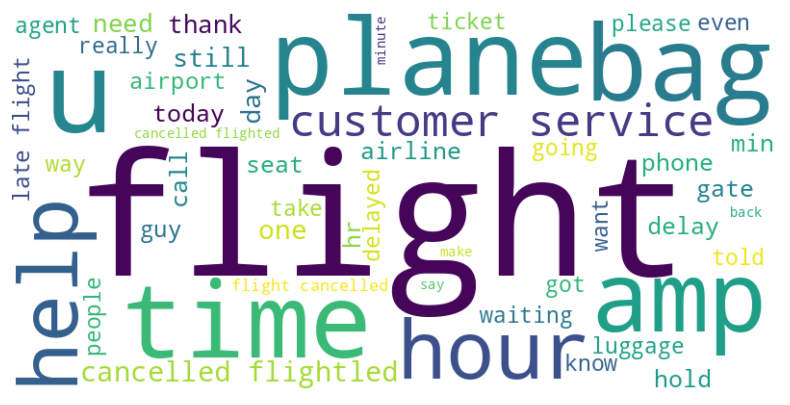

Word Cloud for Neutral Sentiment


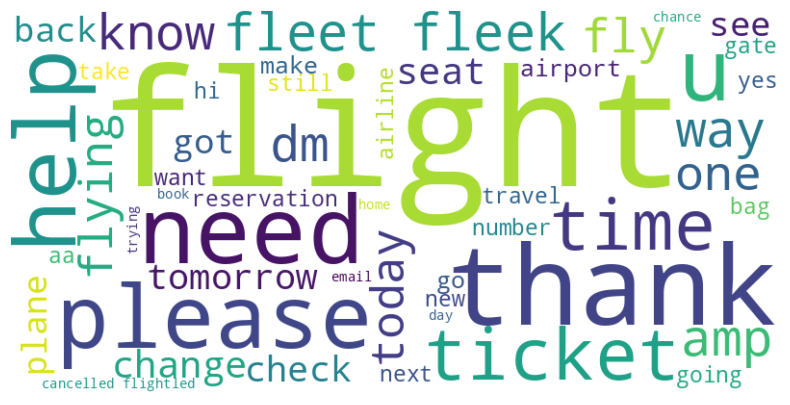

Word Cloud for Positive Sentiment


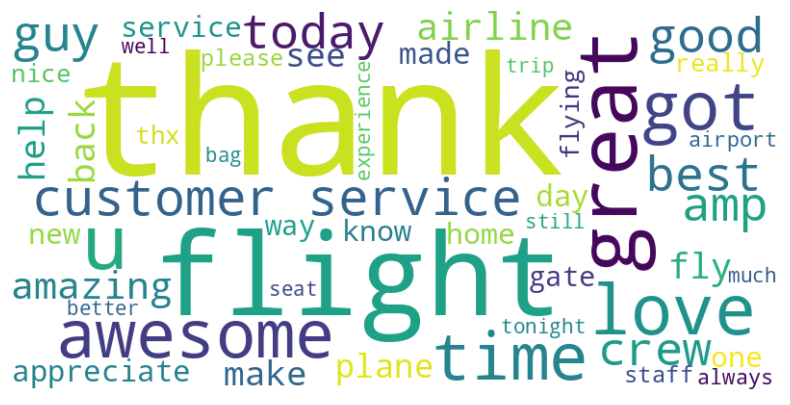

In [11]:
# Create word clouds for each sentiment
# Define the sentiments
sentiments = ['negative', 'neutral', 'positive']

# Loop through each sentiment and create a word cloud
for sentiment in sentiments:
    # Print the sentiment being processed
    print(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    # Call the create_word_cloud function to generate a word cloud for the sentiment
    # with the top 50 most frequent words
    create_word_cloud(sentiment, 50)

Word Cloud for Negative Sentiment


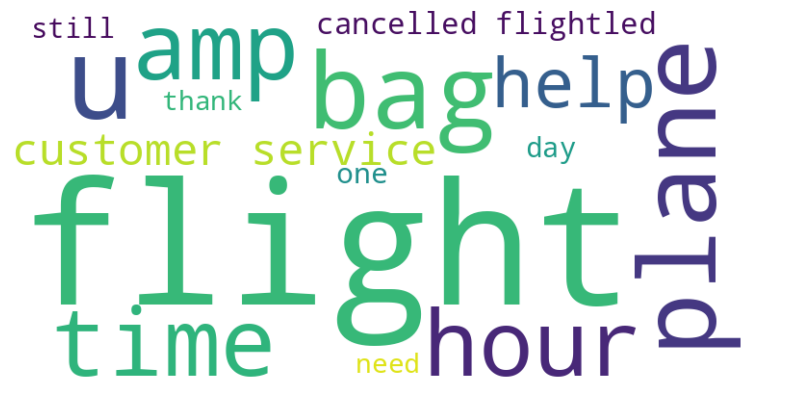

Word Cloud for Neutral Sentiment


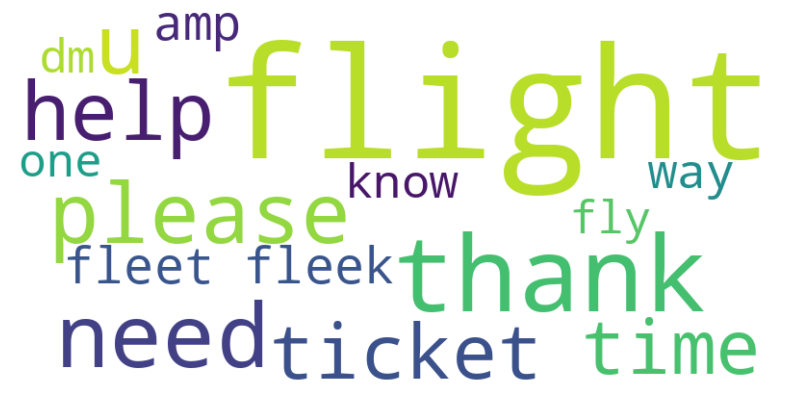

Word Cloud for Positive Sentiment


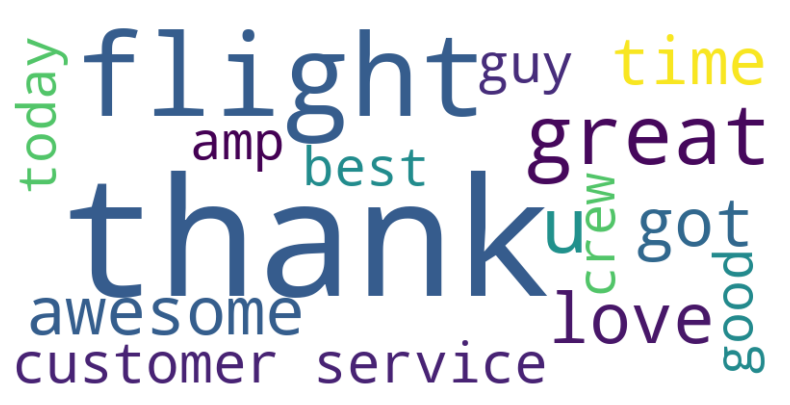

In [12]:
# Loop through each sentiment and create a word cloud
for sentiment in sentiments:
    # Print the sentiment being processed
    print(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    # Call the create_word_cloud function to generate a word cloud for the sentiment
    # with the top 15 most frequent words
    create_word_cloud(sentiment, 15)

In [13]:
# Function to find the top 5 most used words for each sentiment
def top_words(sentiment, n):
    # Filter the data frame to get rows with the specified sentiment
    sentiment_data = data[data['airline_sentiment'] == sentiment]
    # Concatenate the cleaned text for all rows with the specified sentiment
    combined_text = ' '.join(sentiment_data['cleaned_text'])
    # Create a frequency distribution of words in the combined text
    freq_dist = nltk.FreqDist(combined_text.split())
    # Return the n most common words in the frequency distribution
    return freq_dist.most_common(n)

In [14]:
# Print the top 5 most used words for each sentiment
for sentiment in sentiments:
    # Print the sentiment being processed
    print(f'Top 5 most used words for {sentiment.capitalize()} sentiment:')
    # Call the top_words function to get the top 5 most common words for the sentiment
    print(top_words(sentiment, 5))

Top 5 most used words for Negative sentiment:
[('flight', 2394), ('get', 982), ('cancelled', 912), ('customer', 572), ('service', 541)]
Top 5 most used words for Neutral sentiment:
[('flight', 520), ('get', 237), ('-', 202), ('need', 160), ('please', 147)]
Top 5 most used words for Positive sentiment:
[('thank', 452), ('thanks', 397), ('flight', 307), ('great', 194), ('you!', 134)]


#Report

The top five words used to express negative feelings are: "flight," "get," "cancelled," "customer," and "service,".

From the word cloud also canceeled late and work is been there as a major words and from the positive word cloud thank you and loving it shows potive responses from the clients towards the ariline services. 

Top 5 words used to express neutral attitude are: "flight," "get," "-," "need," and "please."

 Top 5 Positive Sentiment Words: ('thank', 452, 'thanks', 397, 'flight', 307, 'great', 194, and 'you!', 134) 
 
 As a result, the dataset's text analytics emphasise the significance of customer happiness and service quality for the airline sector. 
 
 Tweets with a negative tone are more likely to mention flight delays and poor customer service, highlighting areas where airlines may focus their efforts to increase consumer satisfaction. 
 
 Tweets with neutral sentiment imply that users utilise Twitter as a platform to look for information and support, highlighting the necessity for airlines to enhance their social media support. 
 
 Tweets with a favourable mood express thanks and appreciation, highlighting the need of upholding high standards of customer service to promote good feedback on social media sites.

Airlines can efficiently use social media sites like Twitter to improve their brand image and draw in more customers by answering consumer complaints and enhancing services. 

The conclusions drawn from this text analysis can help airlines pinpoint important areas for development, improving customer satisfaction and ultimately boosting economic performance.